In [16]:
%pip install requests

  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/3e/67/7b72b69d25b89c0b3cea583ee372c43aa24df15f0e0f8d3982c57804984b/charset_normalizer-3.4.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for idna<4,>=2.5 from https://files.pythonhosted.org/packages/76/c6/c88e154df9c4e1a2a66ccf0005a88dfb2650c1dffb6f5ce603dfbd452ce3/idna-3.10-py3-none-any.whl.metadata
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.pythonhosted.org/packages/ce/d9/5f4c13cecde62396b0d3fe530a50ccea91e7dfc1ccf0e09c228841bb5ba8/urllib3-2.2.3-py3-none-any.whl.metadata
  Obtaining dependency information for certifi>=2017.4.17 from https://files.pythonhosted.org/packages/12/90/3c9ff0512038035f59d279fddeb79f5f1eccd8859f0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install beautifulsoup4

  Obtaining dependency information for beautifulsoup4 from https://files.pythonhosted.org/packages/b1/fe/e8c672695b37eecc5cbf43e1d0638d88d66ba3a44c4d321c796f4e59167f/beautifulsoup4-4.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for soupsieve>1.2 from https://files.pythonhosted.org/packages/d1/c2/fe97d779f3ef3b15f05c94a2f1e3d21732574ed441687474db9d342a7315/soupsieve-2.6-py3-none-any.whl.metadata
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from bs4 import BeautifulSoup
import requests
import time
import datetime
import smtplib
import random

In [54]:

# connecting to the website
import csv

BASE_URL = 'https://www.jumia.co.ke/mobile-phones/?sort=highest-price&operating_system=iOS--Android#catalog-listing'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:131.0) Gecko/20100101 Firefox/131.0"}

all_scraped_data = []

for page_number in range(1, 5):  # Adjust range to the total number of pages you want to scrape
    print(f"Scraping page {page_number}...")
    
    # Construct the URL for the current page
    URL = BASE_URL.format(page_number)
    
    # Send GET request
    page = requests.get(URL, headers=headers)
    print("Status Code:", page.status_code)
    
    # Check if the request was successful
    if page.status_code != 200:
        print(f"Failed to retrieve page {page_number}")
        continue

    soup1 = BeautifulSoup(page.content, 'html.parser')

    soup2 = BeautifulSoup(soup1.prettify(), 'html.parser')

    items = soup2.find_all(class_="prd _fb col c-prd")


    for item in items:
        # Scrape brand name
        brand = item.find(class_='name') 
        if brand:
            brand_name = brand.get_text().strip()
        else:
            brand_name = 'No brand listed'

        # Scrape price 
        price = item.find(class_='prc') 
        if price:
            price_value = price.get_text().strip()
        else:
            price_value = 'No price listed'

        all_scraped_data.append({
            'Brand': brand_name,
            'Price': price_value
        })

        #print(f"Brand: {brand_name}, Price: {price_value}")



Scraping page 1...
Status Code: 200
Scraping page 2...
Status Code: 200
Scraping page 3...
Status Code: 200
Scraping page 4...
Status Code: 200


In [55]:
# Write the data to a CSV file
with open('jumiaphoneprices.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['Brand', 'Price'])
    writer.writeheader()  # Write header (column names)
    writer.writerows(all_scraped_data)  # Write data rows

print("Data has been written to 'scraped_data.csv'")
    

Data has been written to 'scraped_data.csv'


In [52]:
%pip install pandas


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/a6/84/fa11dad3404b7634aaab50733581ce11e5350383311ea7a7010f464c0170/numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 326.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 260.9 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 260.9 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 260.9 kB/s eta 0:00:01
     --------------------------------------

In [2]:
import pandas as pd
path = 'c:/Users/360/Desktop/PythonProj/jumiaphoneprices.csv'
df = pd.read_csv(path)
print(df)

                                                 Brand        Price
0    Apple IPhone 16 Pro Max - 6.9" - 8GB RAM, 512G...  KSh 275,000
1    Apple IPhone 16 Pro Max - 6.9" - 8GB RAM, 512G...  KSh 275,000
2    Apple IPhone 16 Pro Max - 6.9" - 8GB RAM, 512G...  KSh 275,000
3            Samsung  GALAXY S22 ULTRA 256GB 12G GREEN  KSh 244,800
4    Apple iPhone 15 Pro Max, 6.7", 512GB + 8GB RAM...  KSh 239,999
..                                                 ...          ...
155  Apple IPhone 14 Pro Max, 6.7", 256GB + 6GB RAM...  KSh 189,999
156  Apple IPhone 15 Pro, 6.1", 256GB + 8GB RAM (Si...  KSh 189,999
157  Apple IPhone 15 Pro, 6.1", 128GB + 8GB RAM (Si...  KSh 189,999
158  Samsung Galaxy Z Fold5, 7.6", 512GB + 12GB RAM...  KSh 189,999
159  Apple IPhone 15 Pro, 6.1", 256GB + 8GB RAM (Si...  KSh 189,999

[160 rows x 2 columns]


In [17]:

df_split = df['Brand'].str.split(r'[-,+]', expand= True)

df_split = df_split.iloc[:, :5]
df_split.columns = ['Make', 'Size', 'RAM', 'ROM', 'colour']

df_split = df_split.reindex(columns=['Make', 'Size', 'RAM', 'ROM', 'Colour'])

df_split.head(50)

,Make,Size,RAM,ROM,Colour
0,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,512GB ROM,NaN
1,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,512GB ROM,NaN
2,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,512GB ROM,NaN
3,Samsung GALAXY S22 ULTRA 256GB 12G GREEN,None,None,None,NaN
4,Apple iPhone 15 Pro Max,"6.7""",512GB,8GB RAM (Duos E,NaN
5,Samsung GALAXY S22 ULTRA 128GB 8G BLACK,None,None,None,NaN
6,Apple IPhone 16 Pro Max (256 GB),Physical Duos,Desert Titanium,None,NaN
7,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,256GB ROM,NaN
8,Samsung Galaxy Z Fold 6 Cell Phone,512GB/12,None,None,NaN
9,Apple IPhone 16 Pro Max (256 GB),Physical Duos,White Titanium,None,NaN


In [18]:
# EDA and cleaning up the data significantly
df_split.isnull().sum()

df_clean = df_split.drop(columns=['Colour'])

#df_clean.isnull().sum()

df_new = pd.concat([df_clean, df], axis=1)

df_new = df_new.drop(columns=['Brand'])

#df_new

#Switching the misplaced RAM's into their respective ROM's

# Ensure the columns exist in the DataFrame
if 'RAM' in df_new.columns and 'ROM' in df_new.columns:
    # Condition: If 'RAM' contains values meant for 'ROM' (e.g., storage like '256GB', '512GB')
    condition_ram_is_rom = df_new['RAM'].str.contains(r'^\d+GB$', na=False)

    # Condition: If 'ROM' contains values meant for 'RAM' (e.g., memory like '8GB RAM')
    condition_rom_is_ram = df_new['ROM'].str.contains(r'RAM', na=False)

    # Swap RAM and ROM values for these cases
    df_new.loc[condition_ram_is_rom | condition_rom_is_ram, ['RAM', 'ROM']] = \
        df_new.loc[condition_ram_is_rom | condition_rom_is_ram, ['ROM', 'RAM']].values

    # Display the corrected DataFrame
    print("Swapped RAM and ROM values where necessary:")
    print(df_new.loc[condition_ram_is_rom | condition_rom_is_ram])
else:
    print("Columns 'RAM' or 'ROM' are missing from the DataFrame.")


Swapped RAM and ROM values where necessary:
                            Make    Size                               RAM  \
4        Apple iPhone 15 Pro Max    6.7"                   8GB RAM (Duos E   
10    Samsung Galaxy Z Fold 3 5G   6.7 "                    12GB RAM (Nano   
12      Apple  iPhone 15 Pro Max    6.7"       8GB RAM (Single SIM With E    
13       Apple IPhone 15 Pro Max    6.7"   8GB RAM (Single SIM With E Sim)   
15   Samsung Galaxy S23 Ultra 5G    6.8"   8GB RAM (Single SIM with E sim)   
..                           ...     ...                               ...   
155      Apple IPhone 14 Pro Max    6.7"   6GB RAM (Single SIM with e sim)   
156          Apple IPhone 15 Pro    6.1"              8GB RAM (Single SIM)   
157          Apple IPhone 15 Pro    6.1"              8GB RAM (Single SIM)   
158       Samsung Galaxy Z Fold5    7.6"               12GB RAM (Dual SIM)   
159          Apple IPhone 15 Pro    6.1"              8GB RAM (Single SIM)   

         ROM       

In [19]:
df_new

,Make,Size,RAM,ROM,Price
0,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,512GB ROM,"KSh 275,000"
1,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,512GB ROM,"KSh 275,000"
2,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,512GB ROM,"KSh 275,000"
3,Samsung GALAXY S22 ULTRA 256GB 12G GREEN,None,None,None,"KSh 244,800"
4,Apple iPhone 15 Pro Max,"6.7""",8GB RAM (Duos E,512GB,"KSh 239,999"
...,...,...,...,...,...
155,Apple IPhone 14 Pro Max,"6.7""",6GB RAM (Single SIM with e sim),256GB,"KSh 189,999"
156,Apple IPhone 15 Pro,"6.1""",8GB RAM (Single SIM),256GB,"KSh 189,999"
157,Apple IPhone 15 Pro,"6.1""",8GB RAM (Single SIM),128GB,"KSh 189,999"
158,Samsung Galaxy Z Fold5,"7.6""",12GB RAM (Dual SIM),512GB,"KSh 189,999"


In [11]:
#In this case we keep duplicates to identify most popular item listed
duplicates = df_new.duplicated().sum()
print(duplicates)


125


In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Make    160 non-null    object
 1   Size    148 non-null    object
 2   RAM     144 non-null    object
 3   ROM     136 non-null    object
 4   Price   160 non-null    object
dtypes: object(5)
memory usage: 6.4+ KB


In [20]:
#cleaning the data further for analysis
#Further cleaning to ensure we can carry out some analysis on the data
# Remove the "KSh" prefix and commas from the Price column
df_new['Price'] = df_new['Price'].str.replace(r'KSh\s*', '', regex=True)  # Remove 'KSh' and whitespace
df_new['Price'] = df_new['Price'].str.replace(',', '')  # Remove commas

# Convert the Price column to integers
df_new['Price'] = pd.to_numeric(df_new['Price'], errors='coerce')

# Check for any rows with NaN in the Price column after conversion
if df_new['Price'].isnull().sum() > 0:
    print(f"Rows with invalid Price data: {df_new[df_new['Price'].isnull()]}")

# Optional: Drop rows with NaN in the Price column
df_new = df_new.dropna(subset=['Price'])

# Confirm the data type of the Price column
print(df_new['Price'].dtypes)
df_new

int64


,Make,Size,RAM,ROM,Price
0,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,512GB ROM,275000
1,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,512GB ROM,275000
2,Apple IPhone 16 Pro Max,"6.9""",8GB RAM,512GB ROM,275000
3,Samsung GALAXY S22 ULTRA 256GB 12G GREEN,None,None,None,244800
4,Apple iPhone 15 Pro Max,"6.7""",8GB RAM (Duos E,512GB,239999
...,...,...,...,...,...
155,Apple IPhone 14 Pro Max,"6.7""",6GB RAM (Single SIM with e sim),256GB,189999
156,Apple IPhone 15 Pro,"6.1""",8GB RAM (Single SIM),256GB,189999
157,Apple IPhone 15 Pro,"6.1""",8GB RAM (Single SIM),128GB,189999
158,Samsung Galaxy Z Fold5,"7.6""",12GB RAM (Dual SIM),512GB,189999


In [21]:
df_new.describe()

,Price
count,160.000000
mean,208949.650000
std,27744.883877
min,120000.000000
25%,194499.250000
50%,200000.000000
75%,229250.000000
max,275000.000000


In [23]:
%pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/aa/d1/5f007861cab890f2a35a19a1d2a2815655ec10b0ea

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


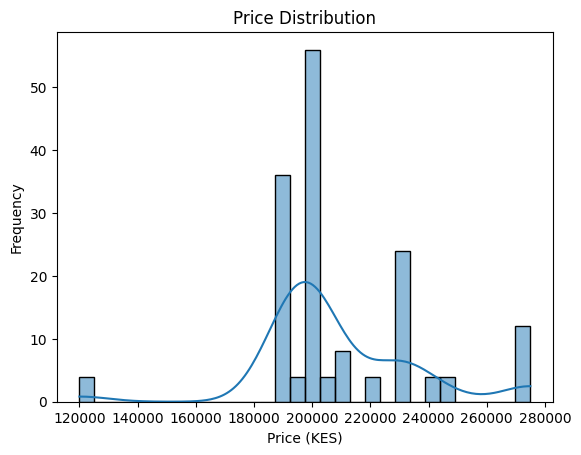

In [24]:
#Price Distribution plot Visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_new['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (KES)')
plt.ylabel('Frequency')
plt.show()

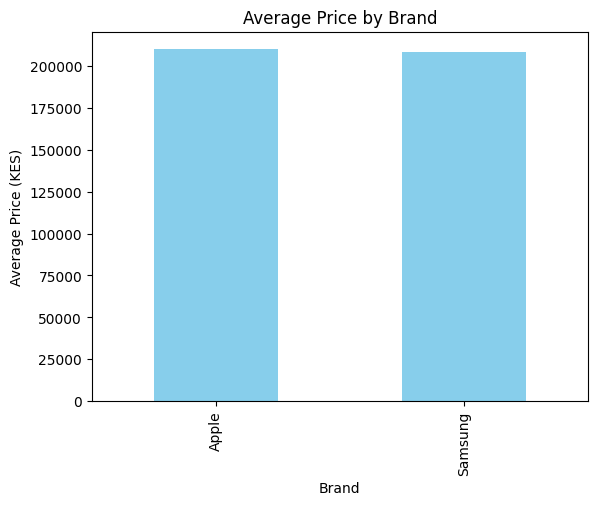

In [25]:
#Average price by brand or Make 
df_new['Brand'] = df_new['Make'].str.extract(r'(Apple|Samsung|Huawei|Nokia|Tecno|Infinix)', expand=False)
avg_price_by_brand = df_new.groupby('Brand')['Price'].mean()

avg_price_by_brand.plot(kind='bar', color='skyblue')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (KES)')
plt.show()

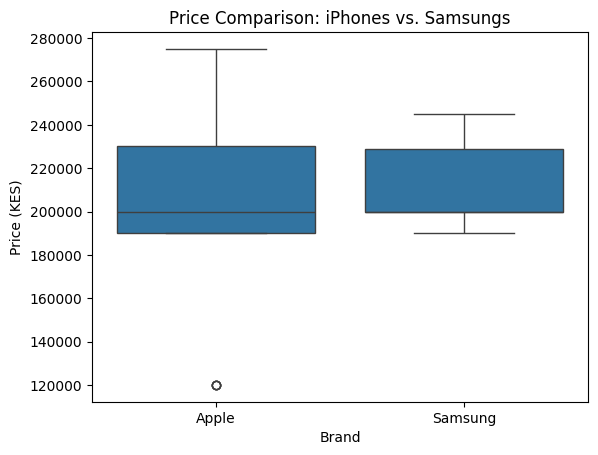

In [26]:
#Price comparison iphones and samsungs
sns.boxplot(x='Brand', y='Price', data=df_new[df_new['Brand'].isin(['Apple', 'Samsung'])])
plt.title('Price Comparison: iPhones vs. Samsungs')
plt.xlabel('Brand')
plt.ylabel('Price (KES)')
plt.show()